In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from matplotlib.colors import LinearSegmentedColormap

## Overview of Dataset

* How many rows and columns does the dataset contain?
* What are the data types of each column? Are there any missing values?

In [3]:
# Load the dataset
df = pd.read_csv('spotify-2023.csv', encoding='latin1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
# Display the first few rows of the dataset
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
# Check the size of the dataset
df.size

22872

In [6]:
# Check the shape of the dataset
df.shape

(953, 24)

In [7]:
# Check the data types of the dataset in each column 
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

#### Isn't weird that streams, deezer_playlist, and shazam_charts objects even though they are numbers? It should be integers as well right? Something must be fishy, we have to cook! :>

In [9]:
# Specify the columns that needs to be cleaned. Since streams, deezer_playlists, and shazam-_charts are all objects, we have to transform them into float by omitting the comma
columns_to_clean = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

# Loop through each specified column to remove commas
for col in columns_to_clean:
    df[col] = df[col].replace(',', '', regex=True) 

In [10]:
# Check the data types of the dataset in each column 
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [11]:
# Count missing values in each column
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [12]:
# Remove commas from 'streams' and convert to float using pd.to_numeric
df['streams'] = pd.to_numeric(df['streams'].replace(',', '', regex=True), errors='coerce')

In [13]:
# Check the data types of the dataset in each column 
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [14]:
# Assuming df is your DataFrame and columns_to_clean are the columns to remove commas from
columns_to_clean = ['in_deezer_playlists', 'in_shazam_charts']

# Remove commas from specified columns
for col in columns_to_clean:
    df[col] = df[col].replace(',', '', regex=True).astype('float')

In [15]:
# Check the data types of the dataset in each column 
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [16]:
# Count missing values in each column
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [85]:
# Remove duplicates based on track_name and artist(s)_name
df.drop_duplicates(subset=['track_name', 'artist(s)_name'], inplace=True)
df.dropna()
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
812,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
813,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
814,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


In [89]:
# Count missing values in each column
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [91]:
# Reset index. So instead of index 0 to 952, we will have 0 to 812. 
df.reset_index(drop=True, inplace=True)

# Remove any unintended columns like 'level_0' and 'index'
for col in ['level_0', 'index']:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# Verify the final structure
print("Final column names:", df.columns)
print("\nFinal dataset shape:", df.shape)
df

Final column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Final dataset shape: (813, 24)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
809,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
810,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
811,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


In [93]:
# Assigned the result to new variable, cleaned
cleaned = df.dropna()
cleaned

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
809,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
810,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
811,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


## Basic Descriptive Statistics

* What are the mean, median, and standard deviation of the streams column?
* What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

In [95]:
# Display the summary of statistics like mean, median, mode, std, and etc. 
cleaned.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,8.130000e+02,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,1.570726,2018.505535,6.019680,13.699877,4850.558426,11.779828,4.689224e+08,59.924969,49.567036,372.646986,2.437884,57.776138,122.546125,67.376384,51.137761,64.341943,26.404674,1.660517,18.168512,10.551046
std,0.877457,10.719970,3.572901,9.288133,7756.839581,18.645236,5.239815e+08,74.684331,49.624745,1159.823364,5.368916,153.877419,28.195428,14.701665,23.652049,16.137225,25.496543,8.764734,13.559208,10.238362
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,1.342558e+08,12.000000,6.000000,12.000000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2035.000000,3.000000,2.634533e+08,32.000000,34.000000,39.000000,0.000000,3.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4875.000000,16.000000,6.009768e+08,78.000000,84.000000,142.000000,2.000000,39.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,12367.000000,45.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [97]:
# Mean, Median, and Standard Deviation of the 'STREAMS' column
meanStreams = cleaned['streams'].mean()  # Calculate the mean of the streams
medianStreams = cleaned['streams'].median()  # Calculate the median of the streams
stdStreams = cleaned['streams'].std()  # Calculate the standard deviation of the streams

print(f"Mean of streams: {meanStreams}") # Print the mean of the streams
print(f"Median of streams: {medianStreams}") # Print the median of the streams
print(f"Standard Deviation of streams: {stdStreams}") # Print the standard deviation of the streams

Mean of streams: 468922407.2521525
Median of streams: 263453310.0
Standard Deviation of streams: 523981505.32150424


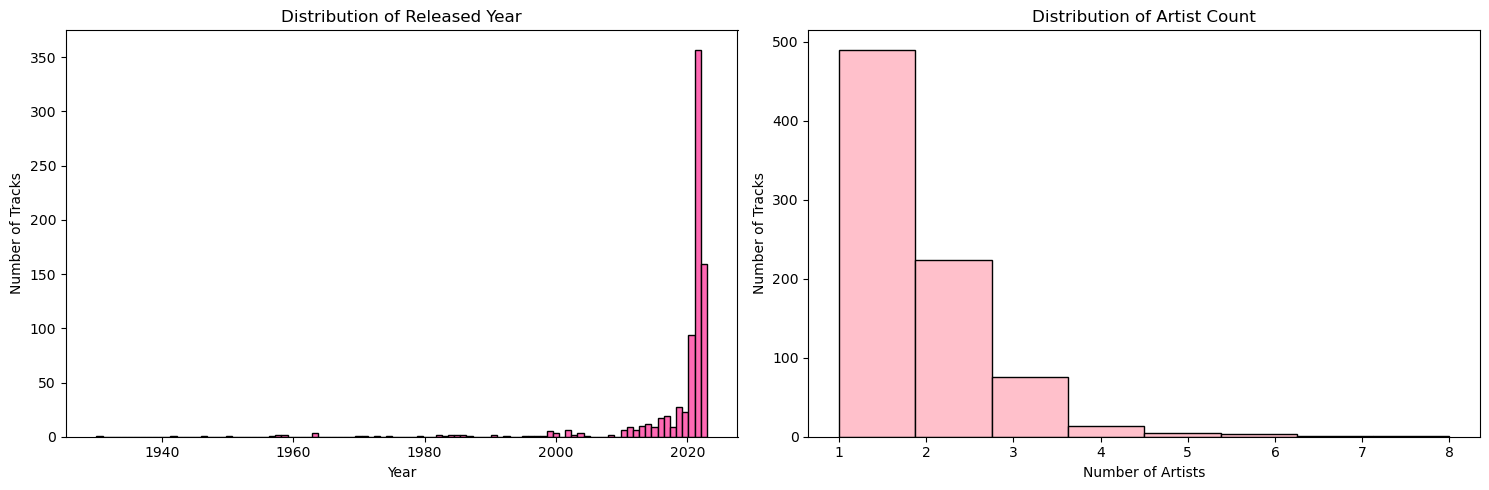

In [99]:
# Distribution of 'released_year' and 'artist_count'
plt.figure(figsize=(15, 5)) # Set the figure size

# Plotting the distribution of released_year
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['released_year'], bins=99, color='#FF69B4', edgecolor='black') # Histogram for the released_year
plt.title('Distribution of Released Year') # Add title to the graph
plt.xlabel('Year') # Add x-axis label
plt.ylabel('Number of Tracks') # Add y-axis label

# Plotting the distribution of artist_count
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
plt.hist(df['artist_count'], bins=8, color='#FFC0CB', edgecolor='black') # Histogram for artist_count
plt.title('Distribution of Artist Count') # Add title to the graph
plt.xlabel('Number of Artists') # Add x-axis label
plt.ylabel('Number of Tracks') # Add y-axis label

# Show the plots
plt.tight_layout() # Adjust layout to prevent overlap
plt.show() # Show the plots

In [101]:
# Function to identify outliers using the IQR (Interquartile Range) method
def identifyOutliersIqr(column):
    q1 = column.quantile(0.25) # First quartile (25th percentile)
    q3 = column.quantile(0.75) # Third quartile (75th percentile)
    iqr = q3 - q1 # Calculate the IQR
    lowerBound = q1 - 1.5 * iqr # Calculate the lower bound for outliers
    upperBound = q3 + 1.5 * iqr # Calcular the upper bound for outliers
    outliers = column[(column < lowerBound) | (column > upperBound)] # Identify values below lowerBound or above upperBound as outliers
    return outliers, len(outliers), q1, q3, iqr # Return outliers and relevant statistics

# Identify outliers for 'released_year'
outliersReleasedYear, totalOutliersYear, q1Year, q3Year, iqrYear = identifyOutliersIqr(cleaned['released_year'])
print(f"\nTotal number of outliers in Released Year: {totalOutliersYear}") # Display the total outliers for released_year

# Identify outliers for 'artist_count'
outliersArtistCount, totalOutliersArtist, q1Artist, q3Artist, iqrArtist = identifyOutliersIqr(cleaned['artist_count'])
print(f"\nTotal number of outliers in Artist Count: {totalOutliersArtist}") # Display total outliers for artist_count


Total number of outliers in Released Year: 180

Total number of outliers in Artist Count: 24


#### Distribution of Released Year
* The histogram shows a significant peak in tracks released in 2020, indicating a surge in music production during that time compared to previous years.

#### Distribution of Artist Count
* Most tracks are by solo artists rather than groups, suggesting that solo acts dominate the market in this dataset.


## Top Performers

* Which track has the highest number of streams? Display the top 5 most streamed tracks.
* Who are the top 5 most frequent artists based on the number of tracks in the dataset?

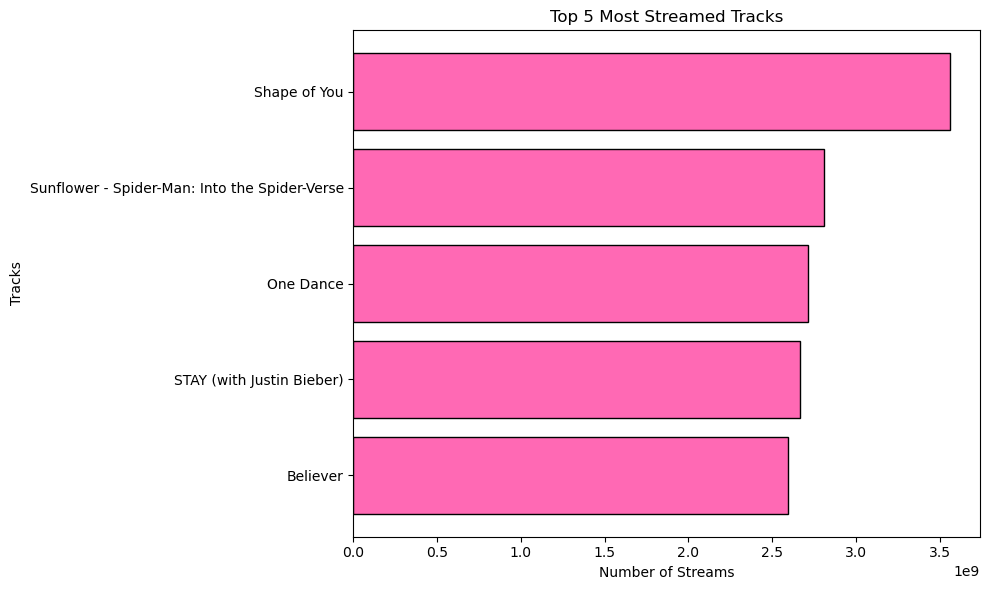


Top 5 Most Streamed Tracks:
+-----------------------------------------------+--------------+
| track_name                                    | streams      |
+-----------------------------------------------+--------------+
| Shape of You                                  | 3562543890.0 |
| Sunflower - Spider-Man: Into the Spider-Verse | 2808096550.0 |
| One Dance                                     | 2713922350.0 |
| STAY (with Justin Bieber)                     | 2665343922.0 |
| Believer                                      | 2594040133.0 |
+-----------------------------------------------+--------------+


In [105]:
# Select the 'track_name' and 'streams' columns, then find the top 5 tracks with the highest streams
topStreamedTracks = df[['track_name', 'streams']].nlargest(5, 'streams')

# Sort the top tracks in ascending order for correct plotting
topStreamedTracks = topStreamedTracks.sort_values(by='streams', ascending=True)

# Create a horizontal bar graph
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(topStreamedTracks['track_name'], topStreamedTracks['streams'], color='#FF69B4', edgecolor='black')  # Horizontal bar graph

# Add titles and labels
plt.title('Top 5 Most Streamed Tracks')  # Add title
plt.xlabel('Number of Streams')  # Add x-axis label
plt.ylabel('Tracks')  # Add y-axis label
plt.tight_layout()  # Adjust layout to prevent overlap of elements
plt.show()  # Display the plot

# Select the 'track_name' and 'streams' columns, then find the top 5 tracks with the highest streams
topStreamedTracks = df[['track_name', 'streams']].nlargest(5, 'streams')

# Print the top 5 most streamed tracks in a pretty and tabular format
print("\nTop 5 Most Streamed Tracks:")
print(tabulate(topStreamedTracks, headers='keys', tablefmt='pretty', showindex=False, stralign='left'))

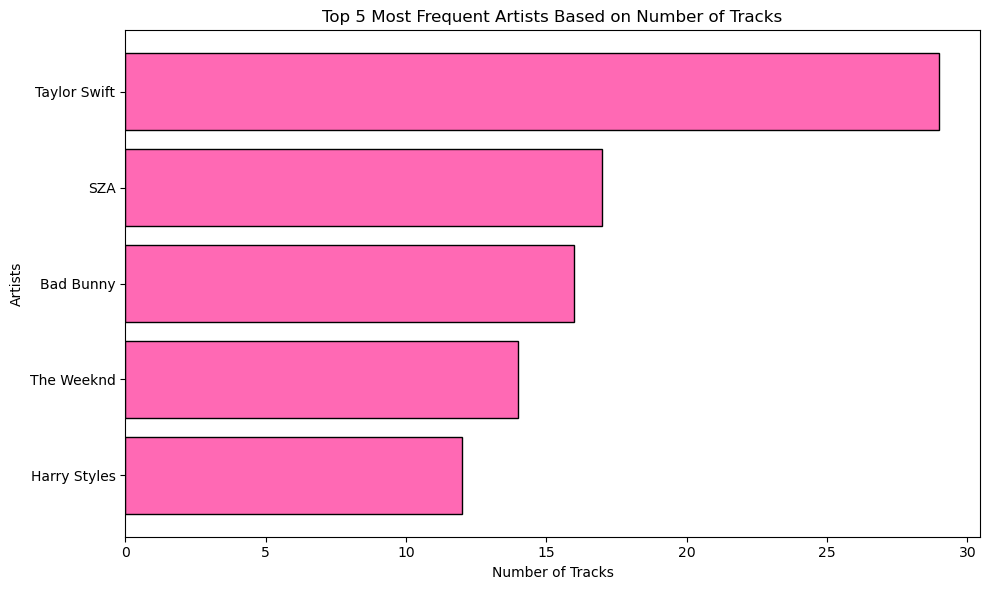


Top 5 Most Frequent Artists:
+----------------+-------------+
| artist(s)_name | track_count |
+----------------+-------------+
| Taylor Swift   | 29          |
| SZA            | 17          |
| Bad Bunny      | 16          |
| The Weeknd     | 14          |
| Harry Styles   | 12          |
+----------------+-------------+


In [107]:
# Group by artist name and count the number of tracks
artistTrackCount = df['artist(s)_name'].value_counts().reset_index()

# Rename the columns for clarity
artistTrackCount.columns = ['artist(s)_name', 'track_count']

# Select the top 5 artists with the most tracks
topArtists = artistTrackCount.nlargest(5, 'track_count')

# Sort the top artists in descending order (most tracks at the top)
topArtists = topArtists.sort_values(by='track_count', ascending=True)  # Sort in ascending order for bar chart

# Create a bar graph for the top 5 artists
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(topArtists['artist(s)_name'], topArtists['track_count'], color='#FF69B4', edgecolor='black')  # Horizontal bar graph

# Add titles and labels
plt.title('Top 5 Most Frequent Artists Based on Number of Tracks')  # Add title
plt.xlabel('Number of Tracks')  # Add x-axis label
plt.ylabel('Artists')  # Add y-axis label
plt.tight_layout()  # Adjust layout to prevent overlap of elements
plt.show()  # Display the plot

# Top 5 most frequent artists based on the number of tracks in the dataset
# Count the occurrences of each artist in the 'artist(s)_name' column and select the top 5
topArtists = cleaned['artist(s)_name'].value_counts().nlargest(5)
topArtistsCleaned = topArtists.reset_index()  # Convert to DataFrame
topArtistsCleaned.columns = ['artist(s)_name', 'track_count']  # Rename the columns

# Print the top 5 most frequent artists in a pretty and tabular format
print("\nTop 5 Most Frequent Artists:")
print(tabulate(topArtistsCleaned, headers='keys', tablefmt='pretty', showindex=False, stralign='left'))

#### Highest Number of Streams
###### The track with the highest number of streams is “Shape of You,” which has an impressive 3,562,543,890 streams. It is followed by “Sunflower - Spider-Man: Into the Spider-Verse” with 2,808,096,550 streams, and “One Dance” with 2,713,922,350 streams. The complete list of the top five most streamed tracks includes “STAY (with Justin Bieber)” and “Believer,” with 2,665,343,922 and 2,594,040,133 streams, respectively.
#### Top 5 most frequent artists
###### Taylor Swift leads with 29 tracks, followed by SZA with 17 tracks and Bad Bunny with 16 tracks. The Weeknd has 14 tracks, while Harry Styles rounds out the top five with 12 tracks. These artists are the most represented in the dataset based on the number of their tracks.


## Temporal Trends

* Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
* Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

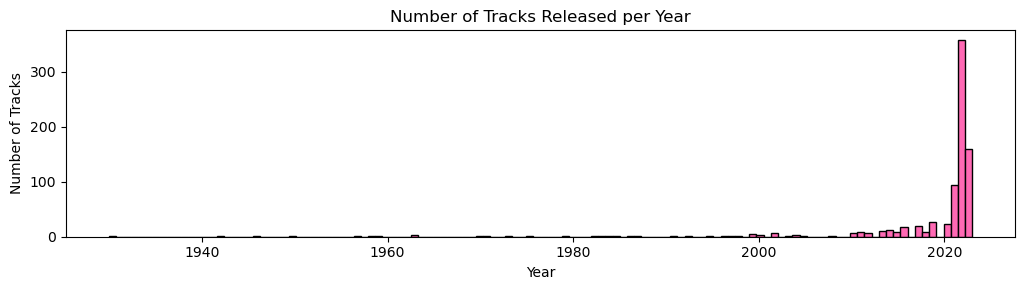

In [109]:
# Analyzing the number of tracks released over time. 
plt.figure(figsize=(20, 3)) # Set the figure size

# Plotting the distribution of released_year
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['released_year'], bins=120, color='#FF69B4', edgecolor='black') # Histogram for number of released per year
plt.title('Number of Tracks Released per Year') # Add title
plt.xlabel('Year') # Add x-axis label
plt.ylabel('Number of Tracks') # Add y-axis label

plt.tight_layout() # Adjust layout to prevent overlap
plt.show() # Show the plots

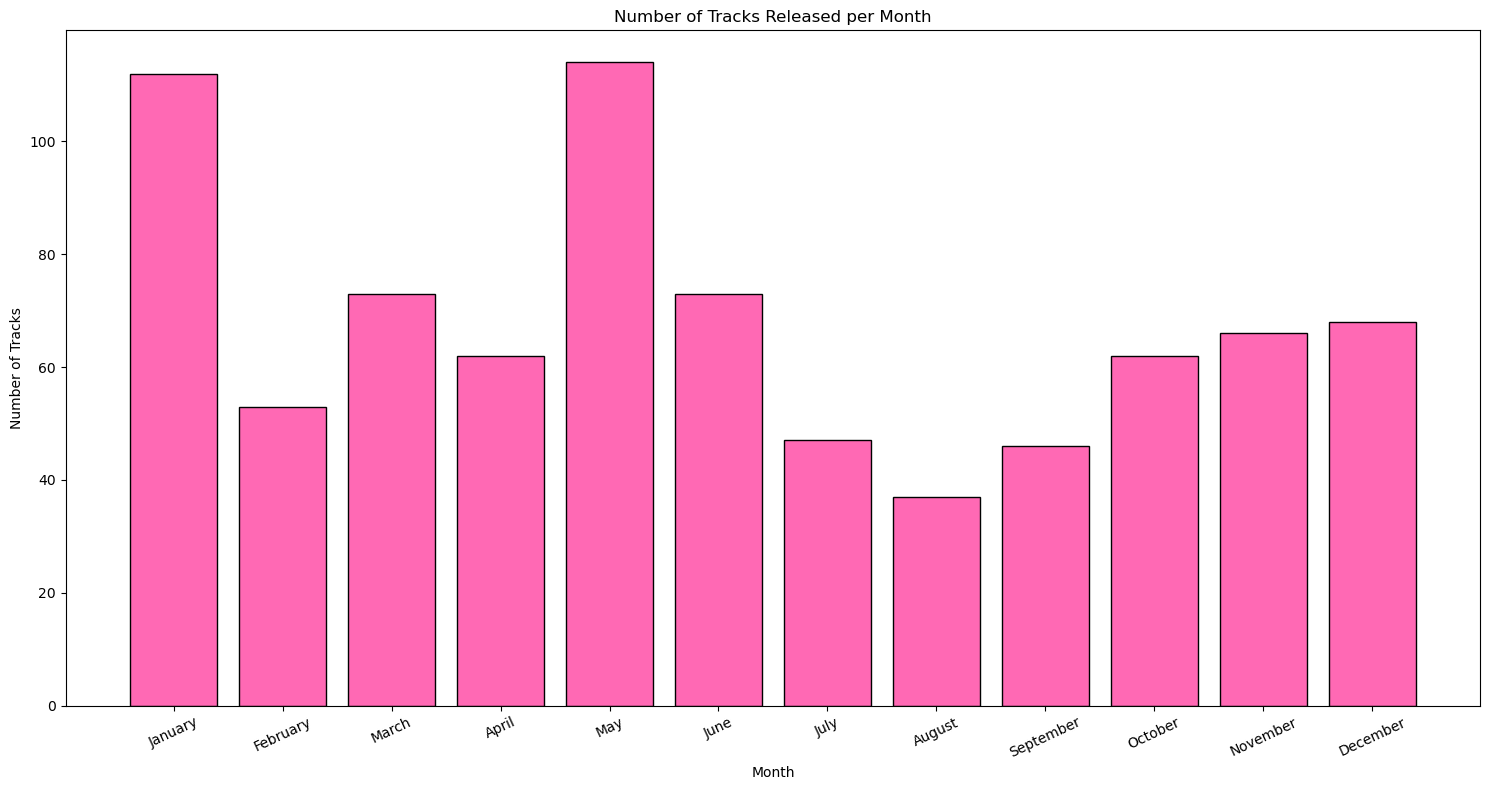

In [113]:
# Analyze the trends in the number of tracks released over time
plt.figure(figsize=(15, 8)) # Set the figure size 

# Plotting the distribution of tracks released per month
plt.subplot(1, 1, 1)  # 1 row, 1 column, 1st subplot
tracksPerMonth = df['released_month'].value_counts().sort_index()  # Count tracks per month
plt.bar(tracksPerMonth.index, tracksPerMonth.values, color='#FF69B4', edgecolor='black') # Create a bar chart of tracks per month
plt.title('Number of Tracks Released per Month') # Add a title to the graph 
plt.xlabel('Month') # Add x-axis label
plt.ylabel('Number of Tracks') # Add y-axis label

# Set x-tick labels to actual month names
monthNames = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks=range(1, 13), labels=monthNames, rotation=25)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show() # Show the plots

### Genre and Music Characteristics

* Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
* Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

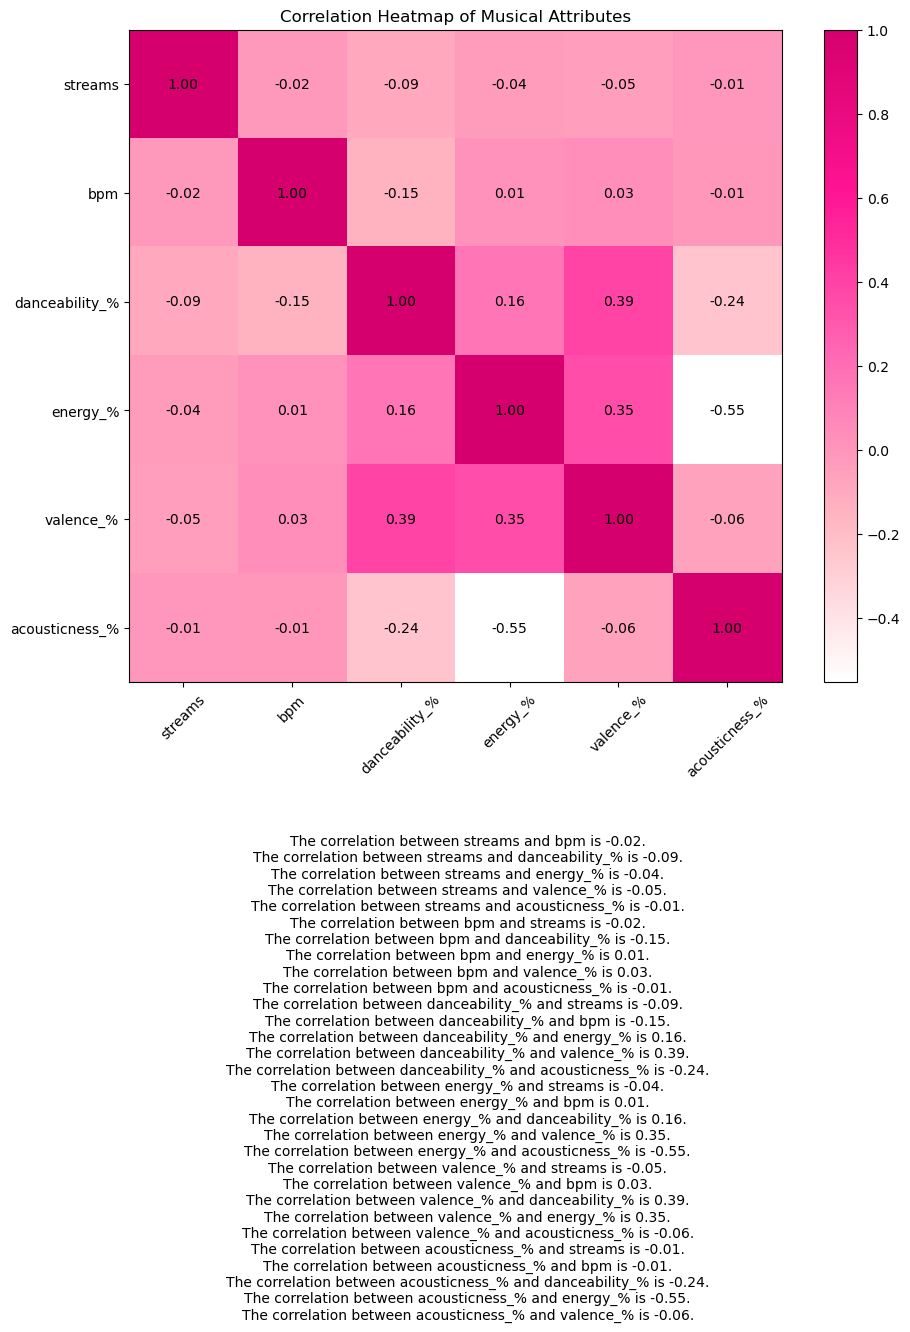

In [115]:
# Specify the columns to analyze for the correlations
columnsToAnalyze = ['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']

# Calculate the correlation matrix for the specified columns
correlationMatrix = cleaned[columnsToAnalyze].corr()

# Create a custom colormap based on your perference but mine is pink
pink_cmap = LinearSegmentedColormap.from_list(
    'pink_shades', 
    ['#FFFFFF', '#FFB6C1', '#FF69B4', '#FF1493', '#D5006D']  # White, Light Pink, Barbie Pink, Bright Pink, Dark Pink
)

# Create a figure for the heatmap
plt.figure(figsize=(10, 8))  # Set the size of the figure
plt.imshow(correlationMatrix, cmap=pink_cmap, interpolation='nearest')  # Draw the heatmap using our pink colormap
plt.colorbar()  # Show a color scale on the side of the heatmap

# Set the ticks and labels for the axes to show our column names
plt.xticks(np.arange(len(correlationMatrix.columns)), correlationMatrix.columns, rotation=45)  # X-axis labels
plt.yticks(np.arange(len(correlationMatrix.columns)), correlationMatrix.columns)  # Y-axis labels

# Loop through the correlation matrix and add the correlation values to the heatmap
for (i, j), val in np.ndenumerate(correlationMatrix):
    plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')  # Display the correlation value in each cell

plt.title('Correlation Heatmap of Musical Attributes')  # Set the title of the heatmap

# Prepare sentences describing each correlation to explain the results
correlation_sentences = []  # Create an empty list to store sentences
for i in range(len(correlationMatrix.columns)):
    for j in range(len(correlationMatrix.columns)):
        if i != j:  # Avoid self-correlation (a variable with itself)
            sentence = f"The correlation between {correlationMatrix.columns[i]} and {correlationMatrix.columns[j]} is {correlationMatrix.iloc[i, j]:.2f}."
            correlation_sentences.append(sentence)  # Add the sentence to the list

# Add the sentences below the heatmap for easy reading
plt.figtext(0.5, -0.05, "\n".join(correlation_sentences), ha='center', va='top', fontsize=10)  # Center the text below the heatmap

plt.tight_layout()  # Adjust the layout to make room for the text
plt.show()  # Show the heat map

## Platform Popularity

* How do the numbers of tracks in spotify_playlists, deezer_playlist, and apple_playlists compare? Which platform seems to favor the most popular tracks?

In [37]:
# Convert relevant columns to numeric
# cleaned['in_spotify_playlists'] = pd.to_numeric(cleaned['in_spotify_playlists'], errors='coerce') 
# cleaned['in_deezer_playlists'] = pd.to_numeric(cleaned['in_deezer_playlists'], errors='coerce')
# cleaned['in_apple_playlists'] = pd.to_numeric(cleaned['in_apple_playlists'], errors='coerce')

In [117]:
# Count total tracks for each platform
totalSpotifyTracks = cleaned['in_spotify_playlists'].dropna().sum()  # Sum all tracks in Spotify playlists
totalDeezerTracks = cleaned['in_deezer_playlists'].dropna().sum()    # Sum all tracks in Deezer playlists
totalAppleTracks = cleaned['in_apple_playlists'].dropna().sum()      # Sum all tracks in Apple playlists

In [119]:
# Prepare data for the pie chart
platform_counts = {
    'Spotify Playlists': totalSpotifyTracks, # Total tracks for Spotify
    'Deezer Playlists': totalDeezerTracks, # Total tracks for Deezer
    'Apple Music Playlists': totalAppleTracks # Total tracks for Apple
}

In [121]:
# Define shades of choice for the pie chart, mine is pink 
pink_shades = ['#FFC0CB', '#FF69B4', '#FF1493']  # Light pink, Hot pink, Deep pink

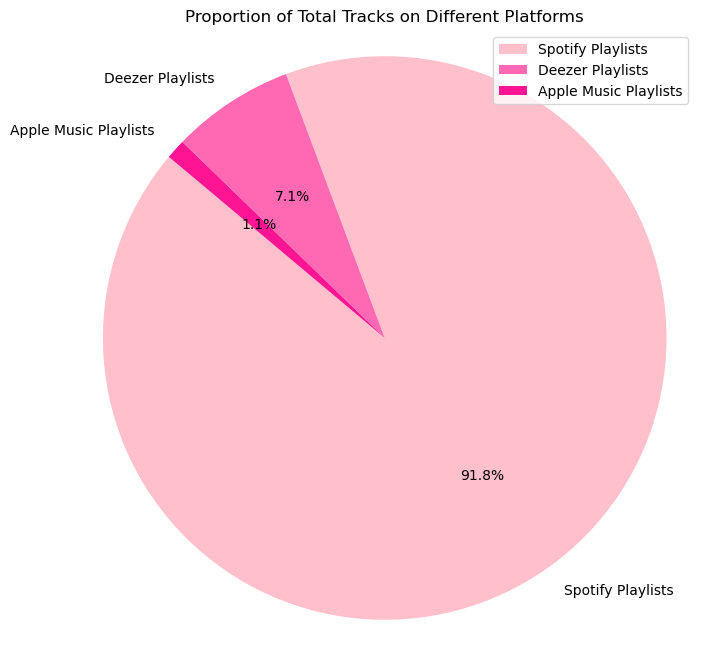

In [123]:
# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(platform_counts.values(), labels=platform_counts.keys(), autopct='%1.1f%%', startangle=140, colors=pink_shades)  # Create the pie chart with percentages
plt.title('Proportion of Total Tracks on Different Platforms')  # Add title to the pie chart
plt.legend() # Add legend
plt.axis('equal')  # Equal aspect ratio. This will ensure the pie chart is circular.
plt.show()  # Show the pie chart

### Advanced Analysis

* Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
* Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

<Figure size 1200x600 with 0 Axes>

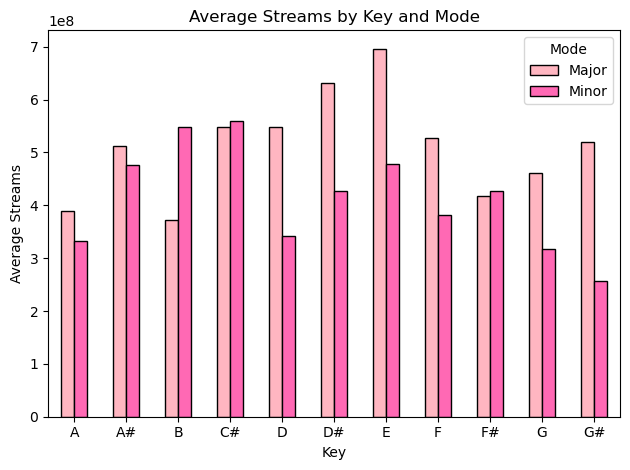

In [125]:
# Group by 'key' and 'mode' and calculate the average streams
key_mode_analysis = df.groupby(['key', 'mode'])['streams'].mean().reset_index() 

# Filter for Major and Minor modes
key_mode_analysis = key_mode_analysis[key_mode_analysis['mode'].isin(['Major', 'Minor'])]

# Calculate average streams for Major and Minor for each key
avg_streams = key_mode_analysis.groupby(['key', 'mode'])['streams'].mean().unstack().fillna(0)

# Set the colors for Major and Minor
colors = ['#FFB6C1', '#FF69B4']  # Light Pink for Major, Barbie Pink for Minor

# Plotting average streams by key and mode
plt.figure(figsize=(12, 6)) # Figure Size
avg_streams.plot(kind='bar', color=colors, edgecolor='black') # Create a bar plot

plt.title('Average Streams by Key and Mode') # Add title
plt.ylabel('Average Streams') # Add y-axis label
plt.xlabel('Key') # Add x-axis label
plt.xticks(rotation=0)  # Set x-tick labels to horizontal
plt.legend(title='Mode')  # Add a legend for Major and Minor
plt.tight_layout()  # Adjust layout to prevent overlap of elements
plt.show()  # Show the graph

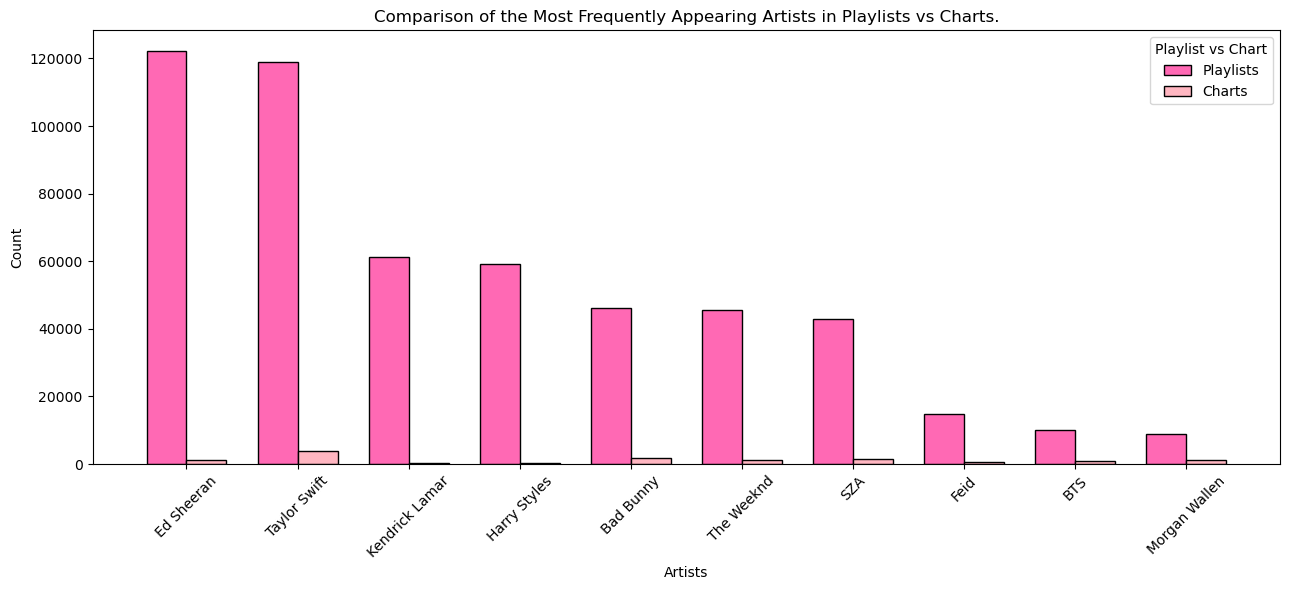

In [135]:
# Calculate total playlists and charts, using .loc[] to avoid SettingWithCopyWarning
cleaned.loc[:, 'total_playlists'] = (cleaned['in_spotify_playlists'].fillna(0) + # Fill NaN values with 0 and sum Spotify playlists
                                      cleaned['in_apple_playlists'].fillna(0) + # Fill NaN values with 0 and sum Apple playlists
                                      cleaned['in_deezer_playlists'].fillna(0)) # Fill NaN values with 0 and sum Deezer playlists

cleaned.loc[:, 'total_charts'] = (cleaned['in_spotify_charts'].fillna(0) + # Fill NaN values with 0 and sum Spotify charts
                                   cleaned['in_apple_charts'].fillna(0) + # Fill NaN values with 0 and sum Apple charts
                                   cleaned['in_deezer_charts'].fillna(0) + # Fill NaN values with 0 and sum Deezer charts
                                   cleaned['in_shazam_charts'].fillna(0)) # Fill NaN values with 0 and sum Shazam charts

# Calculate the top 10 artists 
topArtists = cleaned['artist(s)_name'].value_counts().nlargest(10)  # Get the top 10 artists 
topArtistsCleaned = topArtists.reset_index()  # Convert to DataFrame
topArtistsCleaned.columns = ['artist(s)_name', 'track_count']  # Rename the columns

# Filter the dataset for the top 10 artists based on appearance counts
topArtistsList = topArtistsCleaned['artist(s)_name']  # List of top 10 artist names
topArtistsData = cleaned[cleaned['artist(s)_name'].isin(topArtistsList)]  # Filter the DataFrame

# Calculate total playlist and chart 
artistComparison = topArtistsData.groupby('artist(s)_name').agg(
    total_playlists=('total_playlists', 'sum'),  # Summation of playlists 
    total_charts=('total_charts', 'sum')  # Summation of charts
).reset_index()  # Reset the index 

# Add a column to sum playlist and chart 
artistComparison['total_appearances'] = artistComparison['total_playlists'] + artistComparison['total_charts']

# Sort the DataFrame by total appearances (descending order, that is why ascending=False)
artistComparison = artistComparison.sort_values(by='total_appearances', ascending=False)

# Plotting the comparison of playlists and charts
plt.figure(figsize=(13, 6))  # Set the figure size

# Set the bar width and positions
bar_width = 0.36  # Set the width depending on your preferences
index = np.arange(len(artistComparison))  # Position of artist

# Plot total playlist appearances
plt.bar(index, artistComparison['total_playlists'], bar_width, label='Playlists', color='#FF69B4', edgecolor='black')

# Plot total chart appearances, with an offset to appear beside playlists
plt.bar(index + bar_width, artistComparison['total_charts'], bar_width, label='Charts', color='#FFB6C1', edgecolor='black')

# Adding titles and labels
plt.title('Comparison of the Most Frequently Appearing Artists in Playlists vs Charts.')  # Add title 
plt.xlabel('Artists')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label
plt.xticks(index + bar_width / 2, artistComparison['artist(s)_name'], rotation=45)  # Set artist names as x-tick labels
plt.legend(title='Playlist vs Chart')  # Add Legend

plt.tight_layout()  # Adjust layout
plt.show()  # Show the graph

## References

* Camilleri, P., & McKinney, T. (2015, October 22). Plotting a 2D heatmap. Stack Overflow. https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap 
* CodersLegacy. (2023, August 8). MatPlotLib Colormap Tutorial (LinearSegmentedColormap) [Video]. YouTube. https://www.youtube.com/watch?v=k6_LetPGGMQ 
* Coding Informer. (2023, May 6). How to create heatmaps using Matplotlib and Pandas [Video]. YouTube. https://www.youtube.com/watch?v=mflRx2m_-Bs 
* How to create a linear colormap with color defined at specific values with matplotlib? (n.d.). Stack Overflow. https://stackoverflow.com/questions/74731282/how-to-create-a-linear-colormap-with-color-defined-at-specific-values-with-matpl 
* Ishaan Sharma. (2020, September 11). python matplotlib graphs using csv files, bar, pie, line graph [Video]. YouTube. https://www.youtube.com/watch?v=spALaS5BFX8 
* Moo, M. (2016, May 26). Encoding Error in Panda read_csv. Stack Overflow. https://stackoverflow.com/questions/30462807/encoding-error-in-panda-read-csv 
* eres, G. (2022, July 22). Python Pandas dataframe find missing values. Stack Overflow. https://stackoverflow.com/questions/59694988/python-pandas-dataframe-find-missing-values 
* Pluta, J. (2021, May 15). How to display pretty tables in terminal with tabulate python package? Stack Overflow. https://stackoverflow.com/questions/67548514/how-to-display-pretty-tables-in-terminal-with-tabulate-python-package 
* python pandas groupby() result. (2015, December 30). Stack Overflow. https://stackoverflow.com/questions/17666075/python-pandas-groupby-result 
* Shah, N. (2016, February 20). How do I get the row count of a Pandas DataFrame? (P. Mortensen, Ed.). Stack Overflow. https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe 
* The AI & DS Channel. (2021b, September 21). Bar Chart | Bar Graph using python | Bar chart tutorial [Video]. YouTube. https://www.youtube.com/watch?v=9VK8quGFcSE 



 
